In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [435]:
id = list(range(1, 101))
iq = np.random.randint(0, 201, 100).tolist()
placement = np.random.choice([0, 1], 100).tolist()
cgpa = np.round(np.random.uniform(0, 4, 100), 2).tolist()


data = {"unnamed: 1": id, "iq": iq, "cgpa": cgpa, "placement": placement}

df = pd.DataFrame(data)
df.head()

,unnamed: 1,iq,cgpa,placement
0,1,56,3.32,0
1,2,121,2.80,1
2,3,78,2.26,0
3,4,45,2.25,0
4,5,100,1.56,1


In [436]:
df = df.loc[:, "iq":]
df.head()

,iq,cgpa,placement
0,56,3.32,0
1,121,2.80,1
2,78,2.26,0
3,45,2.25,0
4,100,1.56,1


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iq         100 non-null    int64  
 1   cgpa       100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


<Axes: xlabel='iq', ylabel='cgpa'>

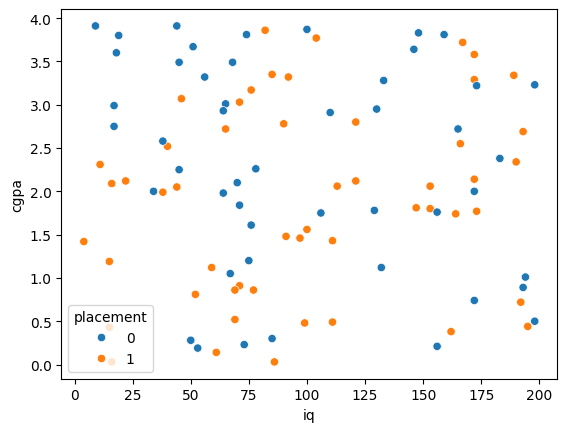

In [438]:
sns.scatterplot(x="iq", y="cgpa", data=df, hue="placement")

In [439]:
X = df.loc[:, :"cgpa"].values
y = df["placement"].values

In [440]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [441]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [442]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [443]:
y_pred = clf.predict(X_test)

In [444]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [449]:
print(f"wrongly predicted: {y_pred[np.where(y_test != y_pred)]}")
print(f"Actual values: {y_test[np.where(y_test != y_pred)]}")

wrongly predicted: [1 1 1 0]
Actual values: [0 0 0 1]


In [445]:
score = accuracy_score(y_test, y_pred)
score

0.8

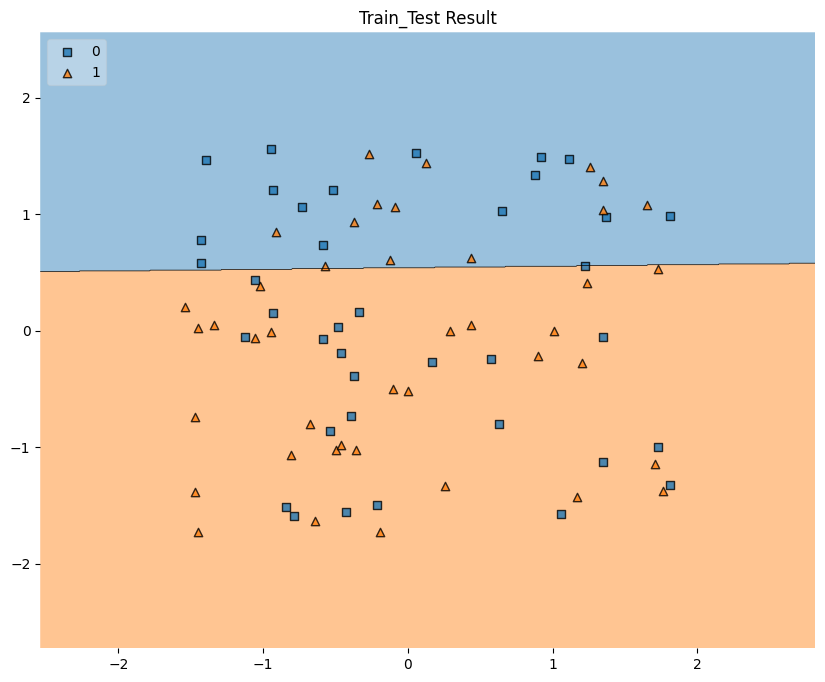

In [457]:
from mlxtend.plotting import plot_decision_regions
import itertools

fig = plt.figure(figsize=(10, 8))

fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
plt.title("Train_Test Result")

plt.show()

In [462]:
# Create a mask for incorrectly predicted samples
# incorrect_mask = y_test != y_pred

# print(incorrect_mask)
# Extract incorrect samples
# X_incorrect = X[incorrect_mask]
# y_true_incorrect = y_test[incorrect_mask]
# y_pred_incorrect = y_pred[incorrect_mask]

# Visualize (e.g., if it's 2D data)
# plt.figure(figsize=(8, 6))

# Scatter plot of incorrect predictions
# plt.scatter(
#     X_incorrect[:, 0],
#     X_incorrect[:, 1],
#     c="red",
#     label="Incorrect Predictions",
#     edgecolor="k",
# )
# plt.title("Incorrect Predictions")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.legend()
# plt.grid(True)
# plt.show()

In [463]:
import pickle

pickle.dump(clf, open("model.pkl", "wb"))